In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from fly2p_function_TQ.imaging_2p_bar_juimping_analysis import run_bar_jumping_analysis_across_trial,plot_the_aligned_bar_jump_trial,sliding_circular_mean

In [3]:
jump_data = run_bar_jumping_analysis_across_trial('/home/tianhaoqiu/Documents/GitHub/2p_analysis/preprocessing_output/normalized/dual_imaging/R55G08_syt7f_R27F02_lexopjRGECO1a(bar_jump)','/home/tianhaoqiu/Documents/GitHub/2p_analysis/preprocessing_output/normalized/dual_imaging/R55G08_syt7f_R27F02_lexopjRGECO1a(bar_jump)/jumping_frame',1,"TQfly")

In [4]:
volume_time = jump_data['volume_time'] 

In [5]:
time_array = np.arange(jump_data['output_PVA_radian_pooled'].shape[1])*volume_time

In [6]:
jump_data.keys()

dict_keys(['output_PVA_radian_pooled', 'output_bar_PVA_offset_pooled', 'output_PVA_strength_pooled', 'output_PVA_strength_z', 'output_bar_jumping_stop_stamp_pooled', 'stop_s_before_jump', 'circular_variance', 'circular_mean_before_jump', 'offset_return_time', 'Angular_speed', 'Angular_speed_entire_trial', 'Bump_speed_entire_trial', 'Forward_speed', 'output_flytrial', 'volume_time', 'Angular_speed_during_offset_return', 'bump_jump_flow_index', 'sec_bump_move', 'delta7_bump_amplitude_at_bump_move', 'Angular_speed_at_bump_move', 'output_PVA_radian_pooled_red', 'output_bar_PVA_red_offset_pooled', 'output_PVA_strength_pooled_red', 'output_greed_red_PVA_offset', 'circular_variance_red', 'PVA_strength_ratio', 'Angular_speed_entire_trial_red', 'EPG_bump_amplitude_at_bump_move', 'EPG_bump_amplitude_before_bar_jump'])

(array([253.,  13.,   5.,   1.,   3.,   0.,   0.,   2.,   1.,   2.]),
 array([ 0.10362 ,  2.766654,  5.429688,  8.092722, 10.755756, 13.41879 ,
        16.081824, 18.744858, 21.407892, 24.070926, 26.73396 ]),
 <BarContainer object of 10 artists>)

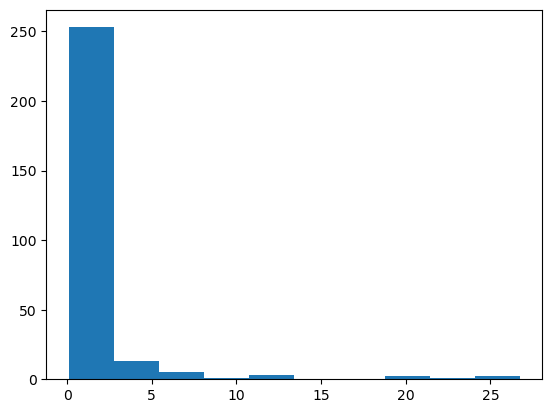

In [7]:
plt.hist(jump_data['sec_bump_move'])

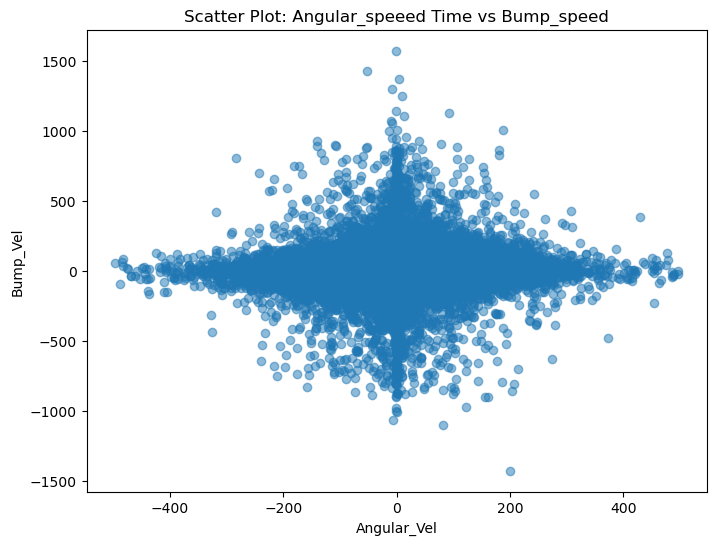

In [8]:
# Extract the columns from the DataFrame
Angular_speed = jump_data['Angular_speed_entire_trial']
Bump_speed= jump_data['Bump_speed_entire_trial']
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Angular_speed , Bump_speed, alpha=0.5)

# Add labels and title
plt.xlabel('Angular_Vel')
plt.ylabel('Bump_Vel')
plt.title('Scatter Plot: Angular_speeed Time vs Bump_speed')

# Show the plot
plt.show()

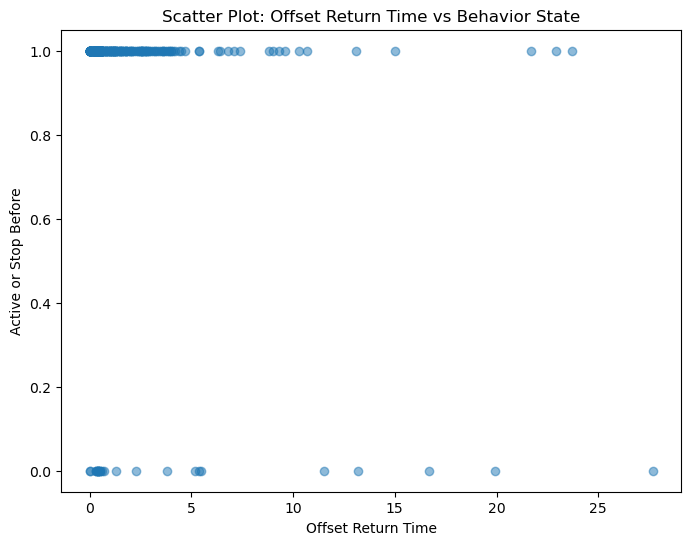

In [9]:
import matplotlib.pyplot as plt

# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
whether_active= jump_data['output_bar_jumping_stop_stamp_pooled']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(offset_return_time, whether_active, alpha=0.5)

# Add labels and title
plt.xlabel('Offset Return Time')
plt.ylabel('Active or Stop Before')
plt.title('Scatter Plot: Offset Return Time vs Behavior State')

# Show the plot
plt.show()

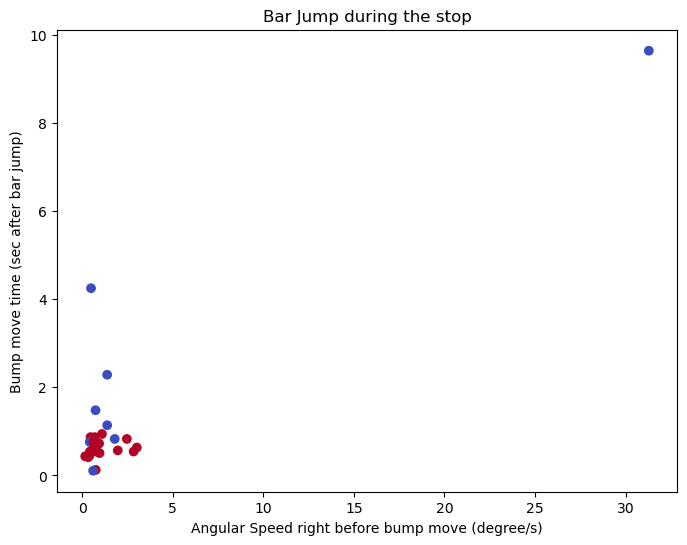

In [13]:

# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
jumping_stop_stamp = jump_data['output_bar_jumping_stop_stamp_pooled']
stop_duration_before = jump_data['stop_s_before_jump']
jump_flow_index =jump_data['bump_jump_flow_index']
bump_amplitude_before_jump = jump_data[ 'EPG_bump_amplitude_at_bump_move']
delta7_bump_amplitude_before_jump = jump_data[ 'delta7_bump_amplitude_at_bump_move']
Angular_speed_before_jump = jump_data['Angular_speed_at_bump_move']
sec_bump_move = jump_data[ 'sec_bump_move']
# Filter the data based on jumping_stop_stamp == 1
filtered_offset_return_time = offset_return_time[jumping_stop_stamp == 0]
filtered_PVA_strength_ratio = PVA_strength_ratio[jumping_stop_stamp == 0]
filtered_stop_duration_before = stop_duration_before[jumping_stop_stamp == 0]
filteree_jump_flow_index = jump_flow_index[jumping_stop_stamp == 0]
filtered_EPG_amplitude = bump_amplitude_before_jump[jumping_stop_stamp == 0]
filtered_delta7_amplitude = delta7_bump_amplitude_before_jump[jumping_stop_stamp == 0]
filtereed_sec_bump_move = sec_bump_move[jumping_stop_stamp == 0]
filtereed_Angular_speed_before_jump  = Angular_speed_before_jump [jumping_stop_stamp == 0]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(filtereed_Angular_speed_before_jump,filtereed_sec_bump_move, c=jump_flow_index, cmap='coolwarm', alpha=1)

# Add a colorbar
#cbar = plt.colorbar(sc)

# Add labels and title
plt.xlabel('Angular Speed right before bump move (degree/s)')
plt.ylabel('Bump move time (sec after bar jump)')
#plt.axhline(y= 1,linestyle ='--', linewidth =2)
plt.title('Bar Jump during the stop')

# Show the plot
plt.show()

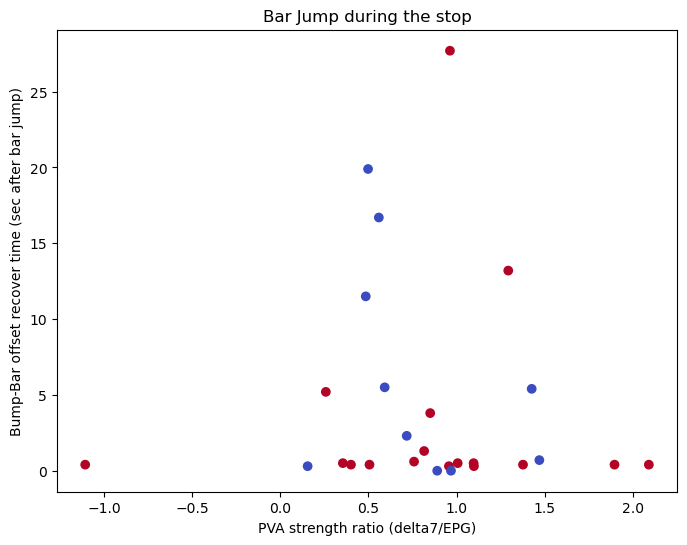

In [43]:

# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
jumping_stop_stamp = jump_data['output_bar_jumping_stop_stamp_pooled']
stop_duration_before = jump_data['stop_s_before_jump']
jump_flow_index =jump_data['bump_jump_flow_index']
bump_amplitude_before_jump = jump_data[ 'EPG_bump_amplitude_at_bump_move']
delta7_bump_amplitude_before_jump = jump_data[ 'delta7_bump_amplitude_at_bump_move']
sec_bump_move = jump_data[ 'sec_bump_move']
# Filter the data based on jumping_stop_stamp == 1
filtered_offset_return_time = offset_return_time[jumping_stop_stamp == 0]
filtered_PVA_strength_ratio = PVA_strength_ratio[jumping_stop_stamp == 0]
filtered_stop_duration_before = stop_duration_before[jumping_stop_stamp == 0]
filteree_jump_flow_index = jump_flow_index[jumping_stop_stamp == 0]
filtered_EPG_amplitude = bump_amplitude_before_jump[jumping_stop_stamp == 0]
filtered_delta7_amplitude = delta7_bump_amplitude_before_jump[jumping_stop_stamp == 0]
filtereed_sec_bump_move = sec_bump_move[jumping_stop_stamp == 0]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(filtered_PVA_strength_ratio,filtered_offset_return_time, c=jump_flow_index, cmap='coolwarm', alpha=1)

# Add a colorbar
#cbar = plt.colorbar(sc)

# Add labels and title
plt.xlabel('PVA strength ratio (delta7/EPG)')
plt.ylabel('Bump-Bar offset recover time (sec after bar jump)')
#plt.axhline(y= 1,linestyle ='--', linewidth =2)
plt.title('Bar Jump during the stop')

# Show the plot
plt.show()

(array([ 33.,   0.,   0.,   0.,   0.,  93.,   0.,   0.,   0., 164.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

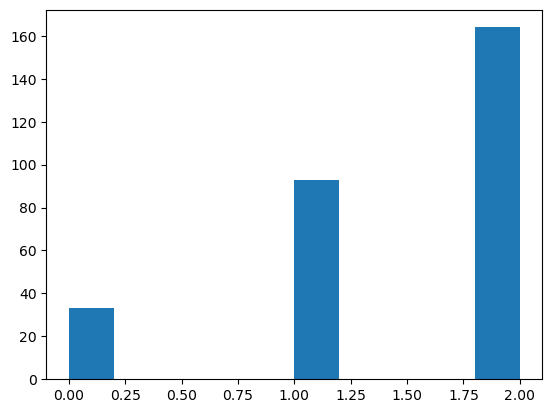

In [31]:
plt.hist(jump_flow_index)

In [32]:
# Flatten the sec_bump_move array to ensure it's 1-dimensional
sec_bump_move_flattened = np.array(sec_bump_move).flatten()

# Extract values from the pandas DataFrame/Series and flatten them
jumping_stop_stamp_flattened = jumping_stop_stamp.values.flatten()
jump_flow_index_flattened = jump_flow_index.values.flatten()

# Apply the boolean mask (ensure both are 1D NumPy arrays)
mask = (jumping_stop_stamp_flattened == 0) & (jump_flow_index_flattened == 2)

# Now apply the mask to the flattened array
filtered_sec_bump_move = sec_bump_move_flattened[mask]

# Calculate the mean of the filtered data
mean_filtered_sec_bump_move = np.nanmean(filtered_sec_bump_move)

print(mean_filtered_sec_bump_move)

0.6113829411764704


In [33]:
filtered_sec_bump_move

array([0.12697, 0.63485, 0.50788, 0.45552, 0.87   , 0.54375, 0.435  ,
       0.94185, 0.5694 , 0.82896, 0.41448, 0.72534, 0.6279 , 0.75411,
       0.54375, 0.54375, 0.87   ])

(array([18.,  4.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  1.]),
 array([ 0.  ,  2.77,  5.54,  8.31, 11.08, 13.85, 16.62, 19.39, 22.16,
        24.93, 27.7 ]),
 <BarContainer object of 10 artists>)

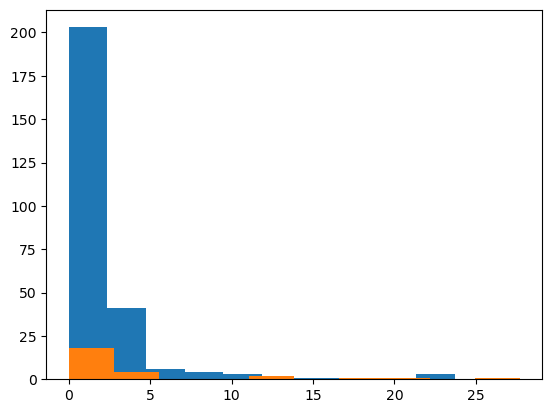

In [34]:
plt.hist(offset_return_time[jumping_stop_stamp == 1])
plt.hist(offset_return_time[jumping_stop_stamp == 0])

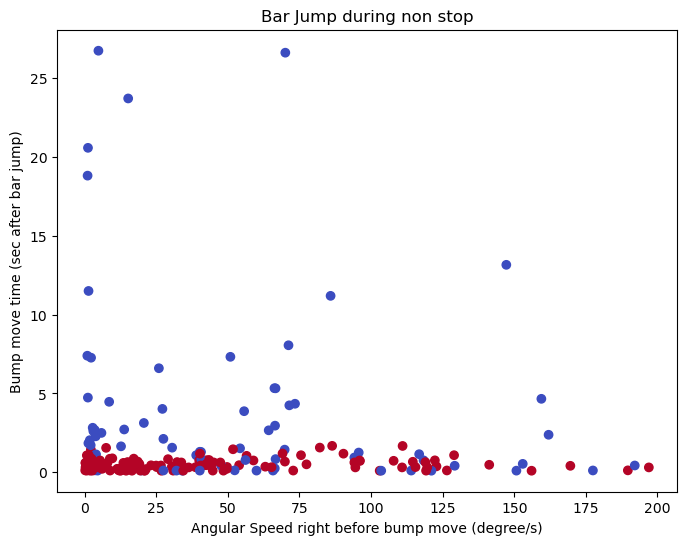

In [14]:

# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
jumping_stop_stamp = jump_data['output_bar_jumping_stop_stamp_pooled']
stop_duration_before = jump_data['stop_s_before_jump']
jump_flow_index =jump_data['bump_jump_flow_index']
bump_amplitude_before_jump = jump_data[ 'EPG_bump_amplitude_at_bump_move']
delta7_bump_amplitude_before_jump = jump_data[ 'delta7_bump_amplitude_at_bump_move']
Angular_speed_before_jump = jump_data['Angular_speed_at_bump_move']
# Filter the data based on jumping_stop_stamp == 1
filtered_offset_return_time = offset_return_time[(jumping_stop_stamp == 1) & (jump_flow_index != 0)]
filtered_PVA_strength_ratio = PVA_strength_ratio[(jumping_stop_stamp == 1) & (jump_flow_index != 0)]
filtered_stop_duration_before = stop_duration_before[(jumping_stop_stamp == 1) & (jump_flow_index != 0)]
filteree_jump_flow_index = jump_flow_index[(jumping_stop_stamp == 1) & (jump_flow_index != 0)]
filtered_EPG_amplitude = bump_amplitude_before_jump[(jumping_stop_stamp == 1) & (jump_flow_index != 0)]
filtered_delta7_amplitude = delta7_bump_amplitude_before_jump[(jumping_stop_stamp == 1) & (jump_flow_index != 0)]
filtereed_sec_bump_move = sec_bump_move[(jumping_stop_stamp == 1) & (jump_flow_index != 0)]
filtereed_Angular_speed_before_jump  = Angular_speed_before_jump [(jumping_stop_stamp == 1) & (jump_flow_index != 0)]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(filtereed_Angular_speed_before_jump,filtereed_sec_bump_move, c=jump_flow_index, cmap='coolwarm', alpha=1)

# Add a colorbar
#cbar = plt.colorbar(sc)

# Add labels and title
plt.xlabel('Angular Speed right before bump move (degree/s)')
plt.ylabel('Bump move time (sec after bar jump)')
#plt.axhline(y= 1,linestyle ='--', linewidth =2)
plt.title('Bar Jump during non stop')

# Show the plot
plt.show()

(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

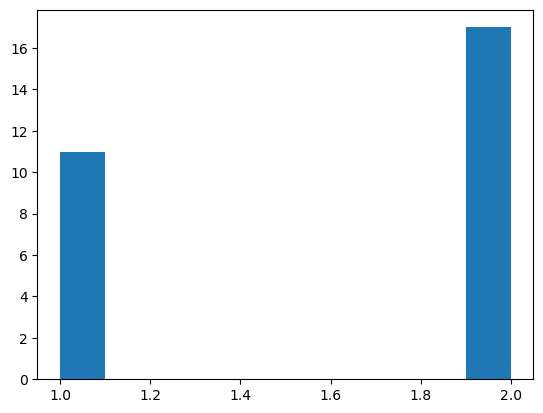

In [38]:
plt.hist(jump_data['bump_jump_flow_index'][(jumping_stop_stamp == 0)& (jump_flow_index != 0)])

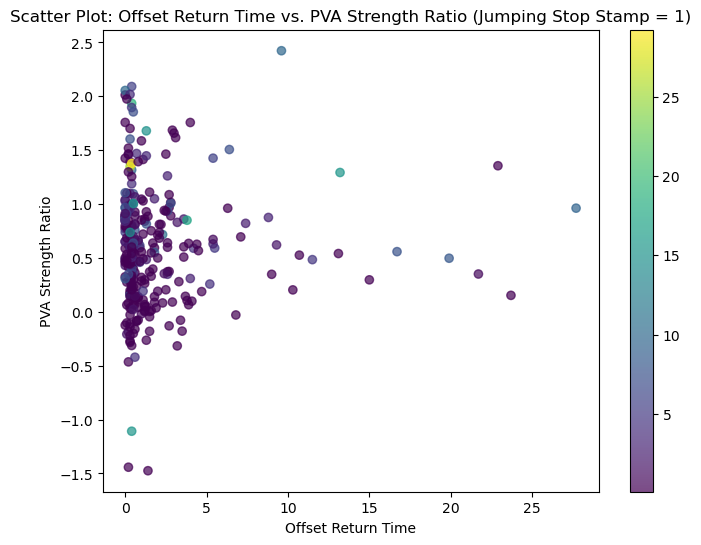

In [39]:
# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
jumping_stop_stamp = jump_data['output_bar_jumping_stop_stamp_pooled']
stop_duration_before = jump_data['stop_s_before_jump']

# Create a scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(offset_return_time, PVA_strength_ratio, c=stop_duration_before, cmap='viridis', alpha=0.7)

# Add a colorbar
cbar = plt.colorbar(sc)

# Add labels and title
plt.xlabel('Offset Return Time')
plt.ylabel('PVA Strength Ratio')
plt.title('Scatter Plot: Offset Return Time vs. PVA Strength Ratio (Jumping Stop Stamp = 1)')

# Show the plot
plt.show()

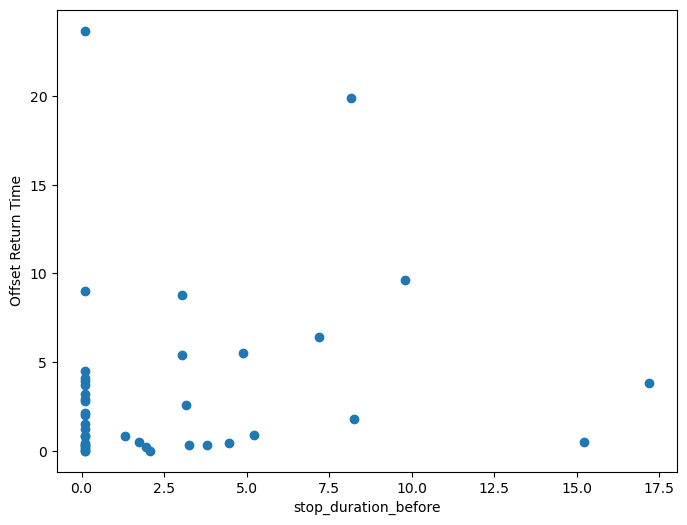

In [104]:
# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
jumping_stop_stamp = jump_data['output_bar_jumping_stop_stamp_pooled']
stop_duration_before = jump_data['stop_s_before_jump']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(stop_duration_before, offset_return_time)


# Add labels and title
plt.xlabel('stop_duration_before')
plt.ylabel('Offset Return Time')
#plt.title('Scatter Plot: Offset Return Time vs. PVA Strength Ratio ')

# Show the plot
plt.show()

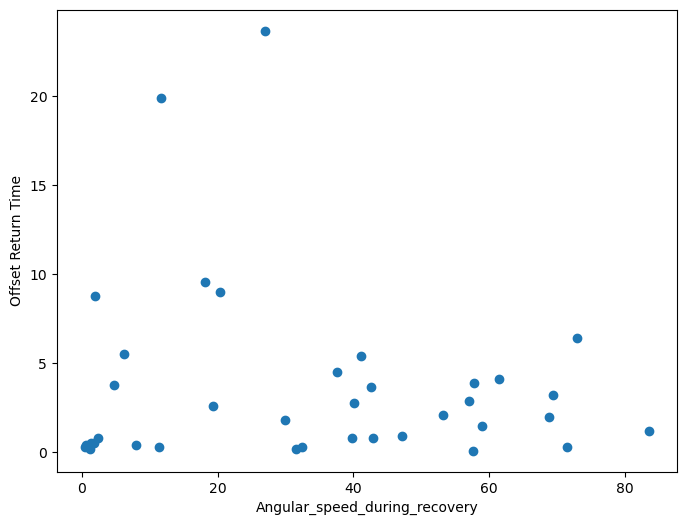

In [105]:
# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
Angular_speed_during_recovery = jump_data['Angular_speed_during_offset_return']
stop_duration_before = jump_data['stop_s_before_jump']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Angular_speed_during_recovery, offset_return_time)


# Add labels and title
plt.xlabel('Angular_speed_during_recovery')
plt.ylabel('Offset Return Time')
#plt.title('Scatter Plot: Offset Return Time vs. PVA Strength Ratio ')

# Show the plot
plt.show()

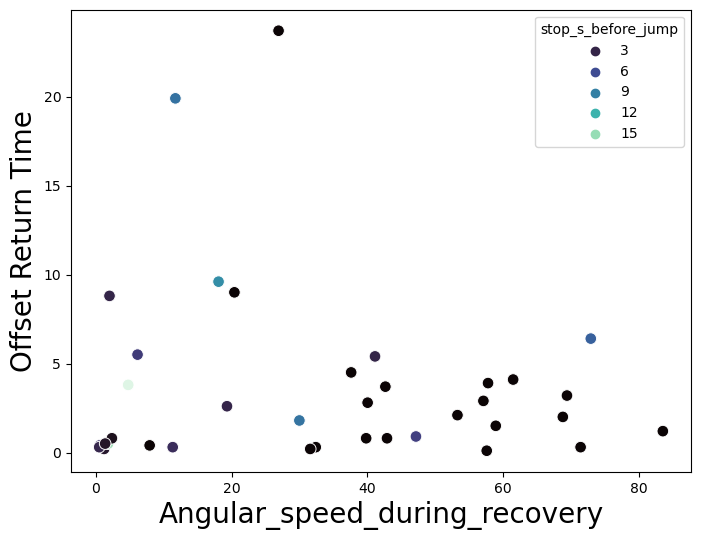

In [106]:
plt.figure(figsize= (8,6))
# Assuming they are 2D arrays, extract the first column if necessary
stop_s_before_jump = jump_data['stop_s_before_jump'].squeeze()
offset_return_time = jump_data['offset_return_time'].squeeze()
PVA_strength_ratio = jump_data['PVA_strength_ratio'].squeeze()
Angular_speed_during_recovery = jump_data['Angular_speed_during_offset_return'].squeeze()


# Combine the data into a DataFrame
data = {
    'stop_s_before_jump': stop_s_before_jump,
    'offset_return_time': offset_return_time,
    'PVA_strength_ratio': PVA_strength_ratio,
    'Angular_speed_during_recovery': Angular_speed_during_recovery
}
df = pd.DataFrame(data)

# Create the scatter plot
cmap = sns.color_palette("mako", as_cmap=True)
snsplot = sns.scatterplot(data=df, x='Angular_speed_during_recovery', y='offset_return_time', s=70, hue='stop_s_before_jump', palette=cmap)

# Add title and labels
plt.xlabel('Angular_speed_during_recovery', fontsize=20)
plt.ylabel('Offset Return Time', fontsize=20)

# Show the plot
plt.show()

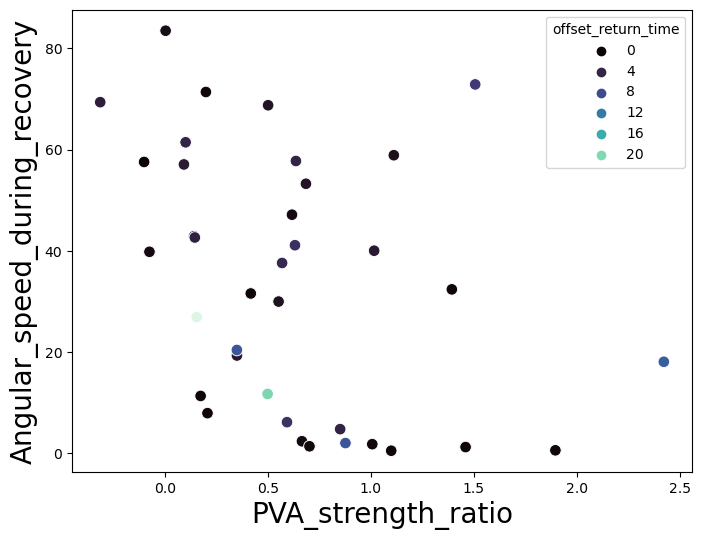

In [107]:
plt.figure(figsize= (8,6))
# Assuming they are 2D arrays, extract the first column if necessary
stop_s_before_jump = jump_data['stop_s_before_jump'].squeeze()
offset_return_time = jump_data['offset_return_time'].squeeze()
PVA_strength_ratio = jump_data['PVA_strength_ratio'].squeeze()
Angular_speed_during_recovery = jump_data['Angular_speed_during_offset_return'].squeeze()


# Combine the data into a DataFrame
data = {
    'stop_s_before_jump': stop_s_before_jump,
    'offset_return_time': offset_return_time,
    'PVA_strength_ratio': PVA_strength_ratio,
    'Angular_speed_during_recovery': Angular_speed_during_recovery
}
df = pd.DataFrame(data)

# Create the scatter plot
cmap = sns.color_palette("mako", as_cmap=True)
snsplot = sns.scatterplot(data=df, x='PVA_strength_ratio', y='Angular_speed_during_recovery', s=70, hue='offset_return_time', palette=cmap)

# Add title and labels
plt.xlabel('PVA_strength_ratio', fontsize=20)
plt.ylabel('Angular_speed_during_recovery', fontsize=20)

# Show the plot
plt.show()

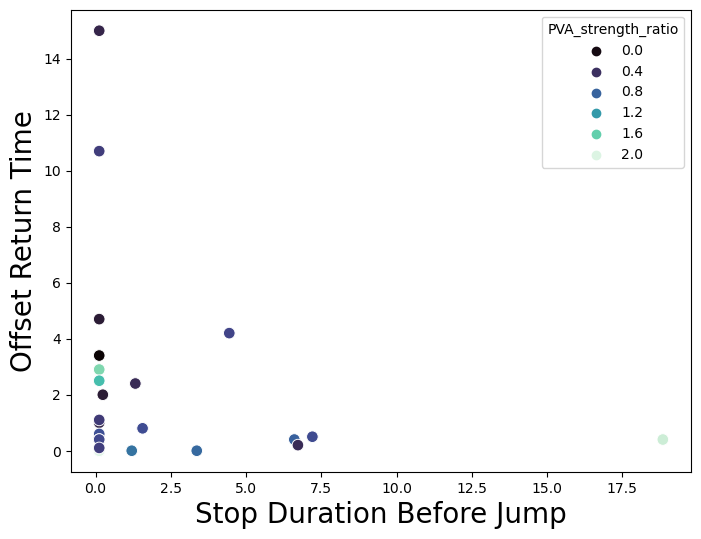

In [93]:
plt.figure(figsize= (8,6))
# Assuming they are 2D arrays, extract the first column if necessary
stop_s_before_jump = jump_data['stop_s_before_jump'].squeeze()
offset_return_time = jump_data['offset_return_time'].squeeze()
PVA_strength_ratio = jump_data['PVA_strength_ratio'].squeeze()


# Combine the data into a DataFrame
data = {
    'stop_s_before_jump': stop_s_before_jump,
    'offset_return_time': offset_return_time,
    'PVA_strength_ratio': PVA_strength_ratio
}
df = pd.DataFrame(data)

# Create the scatter plot
cmap = sns.color_palette("mako", as_cmap=True)
snsplot = sns.scatterplot(data=df, x='stop_s_before_jump', y='offset_return_time', s=70, hue='PVA_strength_ratio',palette=cmap)

# Add title and labels
plt.xlabel('Stop Duration Before Jump', fontsize=20)
plt.ylabel('Offset Return Time', fontsize=20)

# Show the plot
plt.show()


In [12]:
from scipy.stats import pearsonr
# Calculate the Pearson correlation coefficient
r, p_value = pearsonr(df['stop_s_before_jump'], df['offset_return_time'])
print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")

ValueError: array must not contain infs or NaNs

In [8]:
from scipy.stats import circvar
from scipy.stats import circmean
circmean(test,high=np.pi, low= -np.pi)

NameError: name 'test' is not defined

In [9]:
# Calculate the raw difference between consecutive frames
test=np.hstack(jump_data['circular_mean_before_jump'].values)
diff = np.diff(test, axis=-1)
# Adjust the differences to be within the range -π to π
diff = (diff + np.pi) % (2 * np.pi) - np.pi

In [10]:
diff

array([ 4.24883857e-01,  2.92543797e+00,  2.18537609e+00,  8.87015064e-03,
       -1.60525123e-01, -1.67432179e+00, -2.80488601e+00,  7.74714570e-01,
        1.38561115e+00,  2.06797451e+00, -1.48609185e+00, -2.80567050e+00,
       -1.77229598e+00, -1.21229524e+00, -9.59619594e-01,  1.48338731e+00,
        1.15881858e+00,  1.24983184e+00, -1.99024484e+00,  3.13417924e+00,
        2.88745075e+00,  1.00698779e+00, -1.57737014e+00,  3.97664851e-02,
        8.06270050e-01, -4.08022126e-01,  3.00860574e+00, -1.93786034e+00,
       -3.95224234e-01,  4.89970874e-01, -1.70752358e+00,  1.16562076e+00,
        2.38849318e-02, -1.86663736e-01,  2.94372377e+00, -2.64797818e-01,
       -1.12362925e+00,  2.24879668e+00, -1.69496720e+00,  9.66161330e-01,
       -3.34280634e-01, -5.96229928e-01,  3.12051504e+00,  7.30233915e-01,
        1.84730215e-01, -1.37478854e+00, -2.61602282e+00,  2.79411225e+00,
        2.70086413e+00, -2.61610426e+00,  2.34792861e+00, -2.68895438e+00,
        1.31456426e+00,  

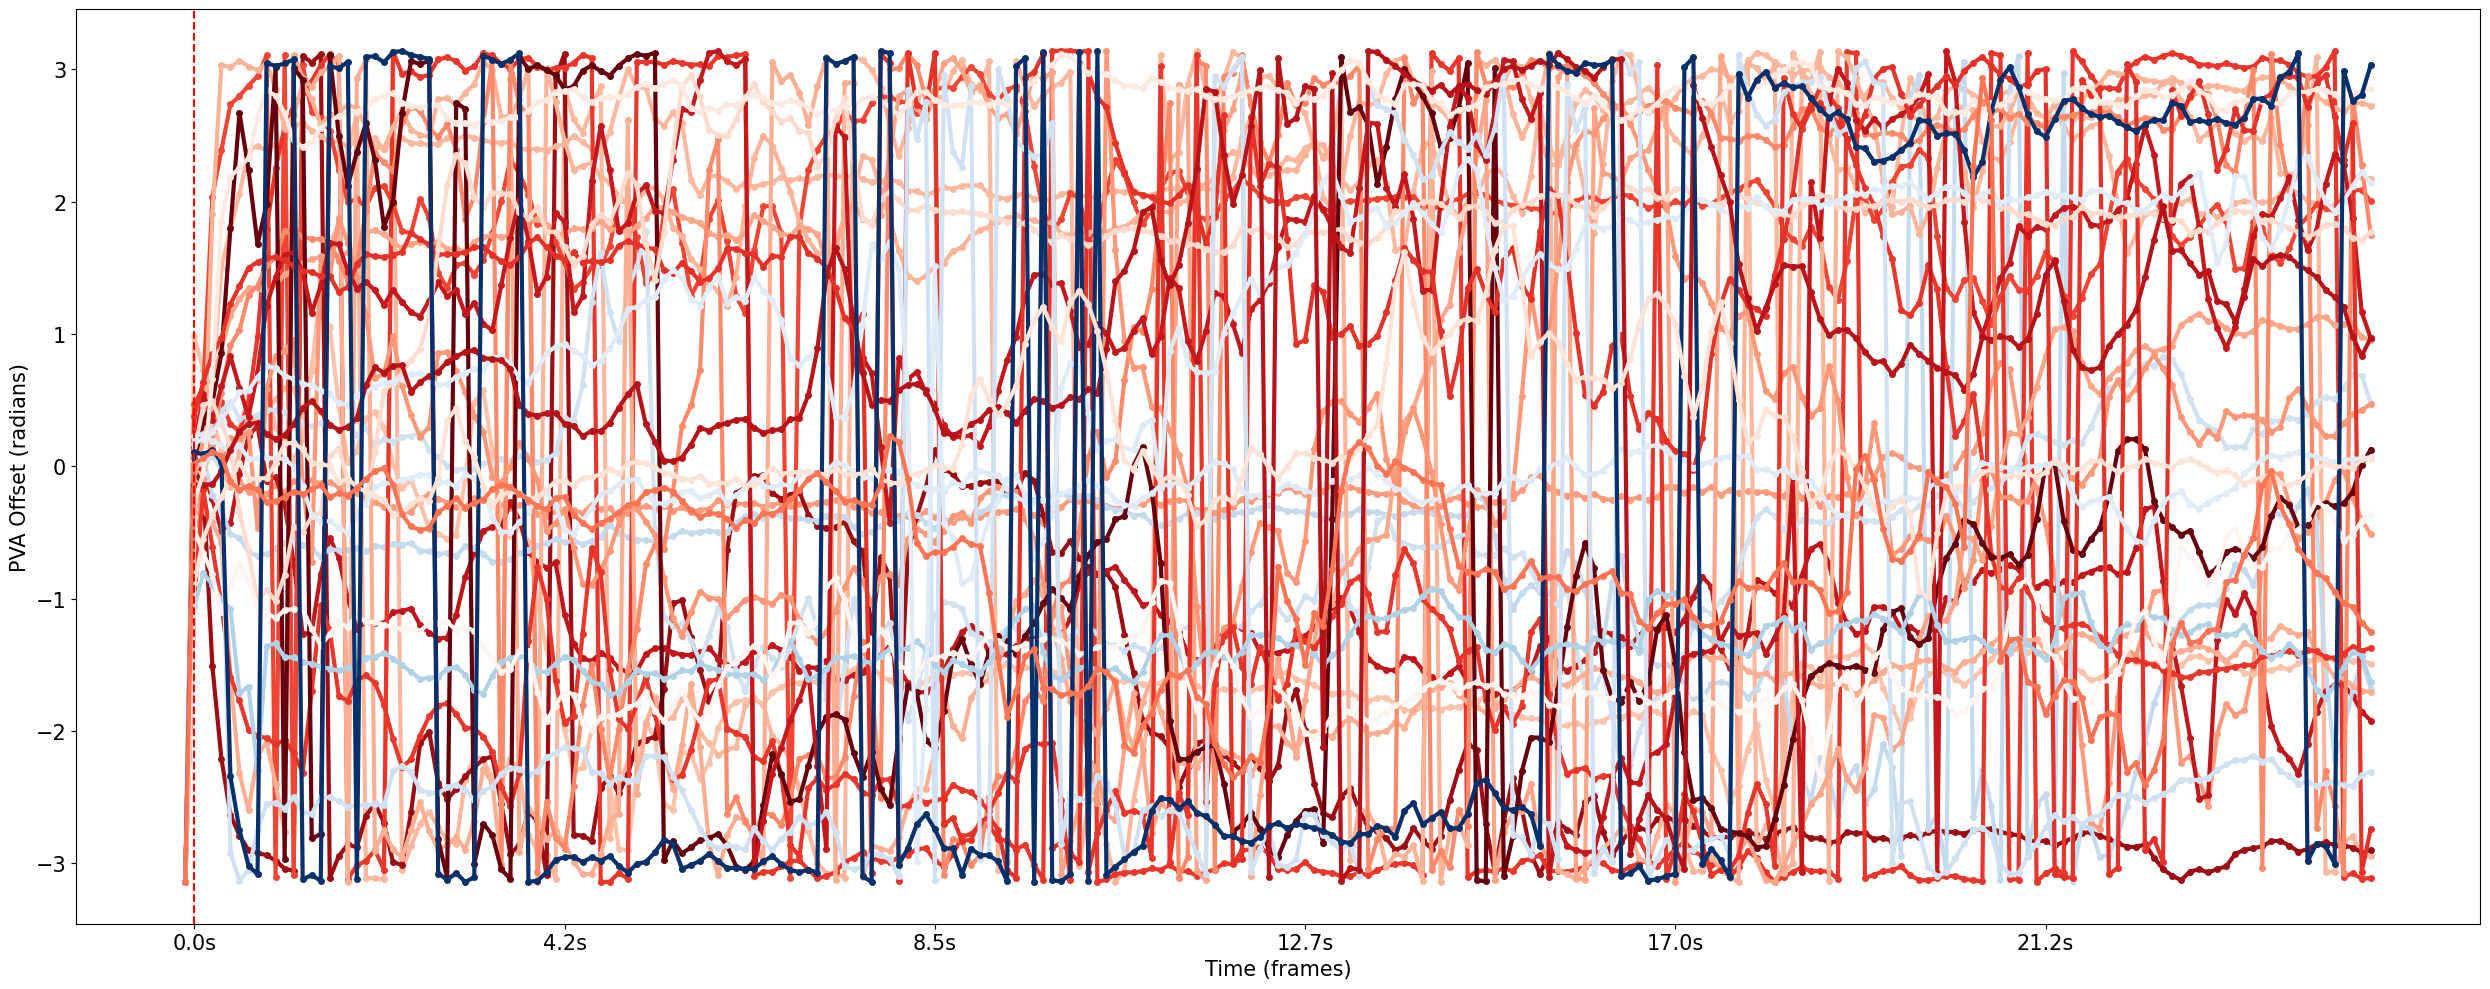

In [19]:
plot_the_aligned_bar_jump_trial(jump_data['output_bar_PVA_offset_pooled'],1,1,-np.pi,jump_data['stop_s_before_jump'],jump_data['PVA_strength_ratio'],1,jump_data['output_bar_jumping_stop_stamp_pooled'],volume_time,s_after_jump = 25)

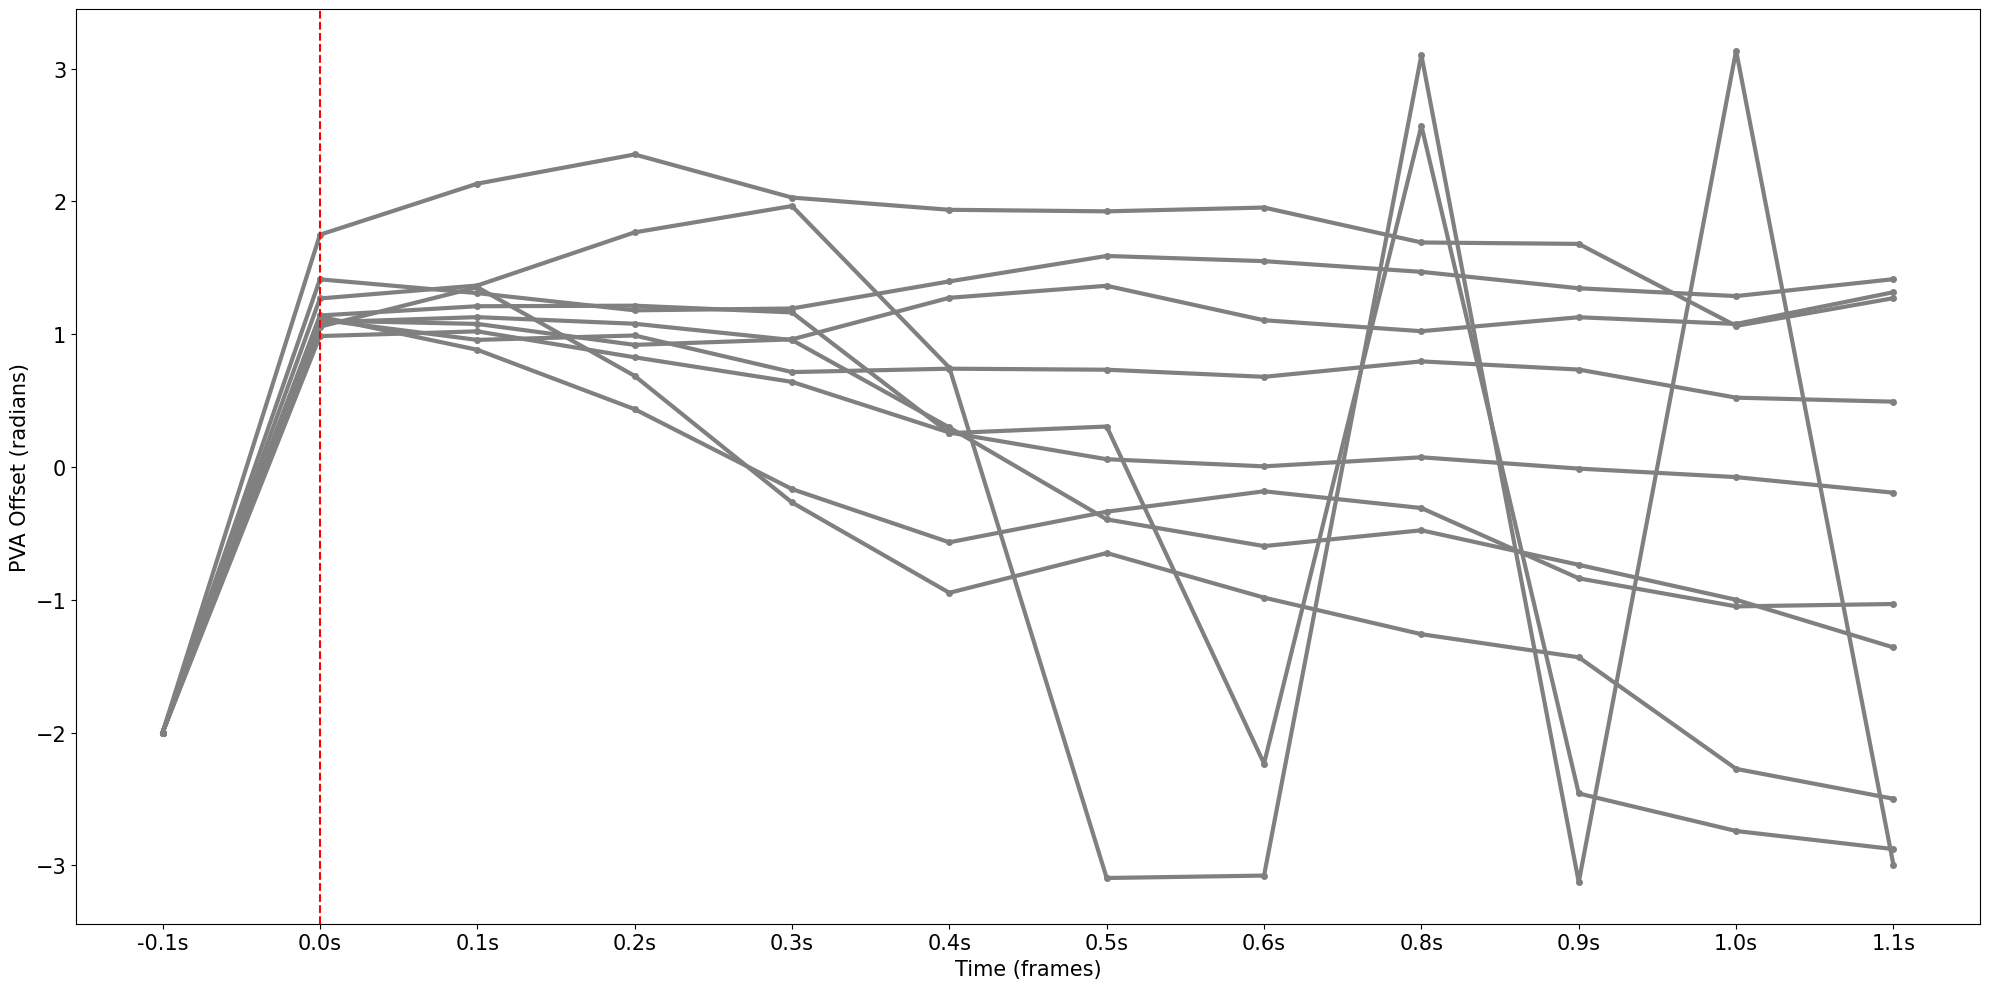

In [11]:
# Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_bar_PVA_offset_pooled']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = -2
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    

# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

# Normalize the stop_duration values to range between 0 and 1 for colormap
stop_duration = jump_data['stop_s_before_jump'].values
norm = plt.Normalize(stop_duration.min(), stop_duration.max())
# Create a monochromatic colormap
colormap = matplotlib.colormaps['Reds']

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    color = colormap(norm(stop_duration[i]))
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = color)
    else:
        plt.plot(range(-1, 11  ), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
#plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

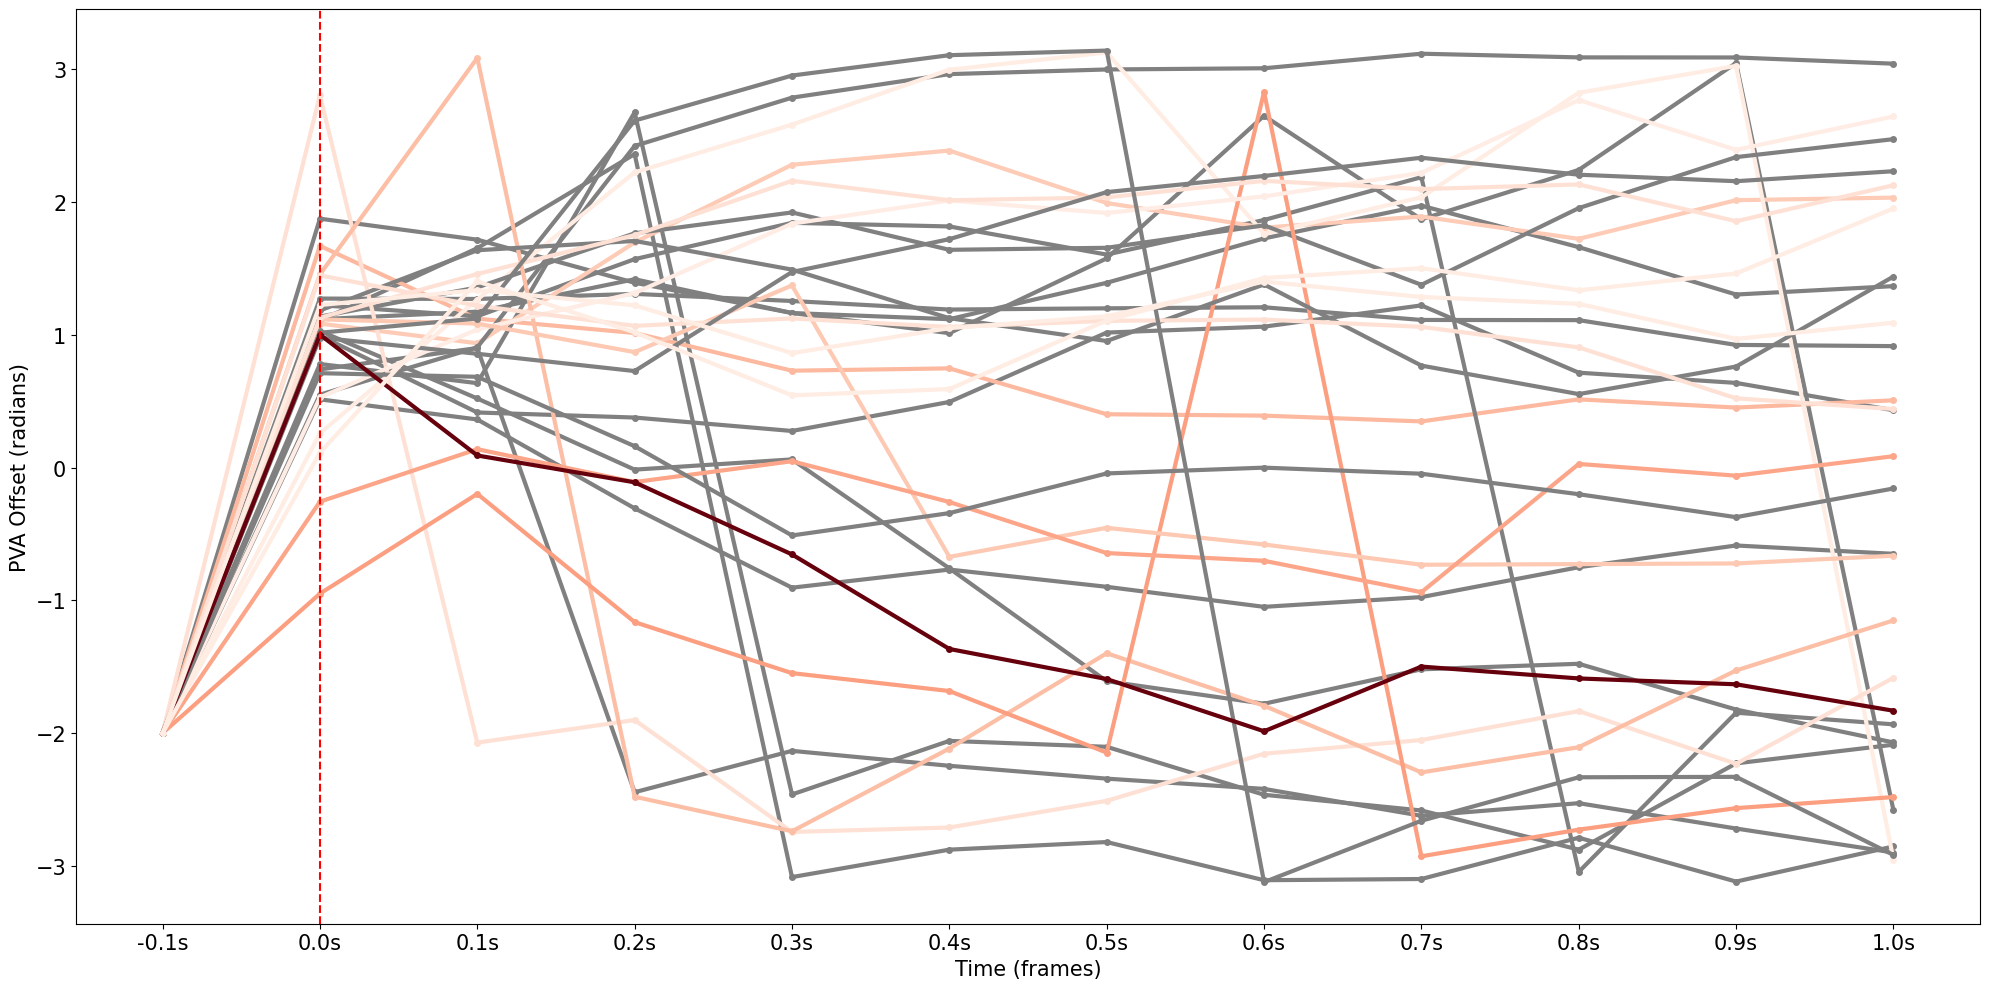

In [91]:
# Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_bar_PVA_red_offset_pooled']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = -2
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    
    
# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame


# Normalize the stop_duration values to range between 0 and 1 for colormap
stop_duration = jump_data['stop_s_before_jump'].values
norm = plt.Normalize(stop_duration.min(), stop_duration.max())
# Create a colormap (you can choose any colormap you prefer)
colormap = matplotlib.colormaps['Reds']


# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    color = colormap(norm(stop_duration[i]))
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = color)
    else:
        plt.plot(range(-1,11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
#plt.title(f"Aligned {data.name}",fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

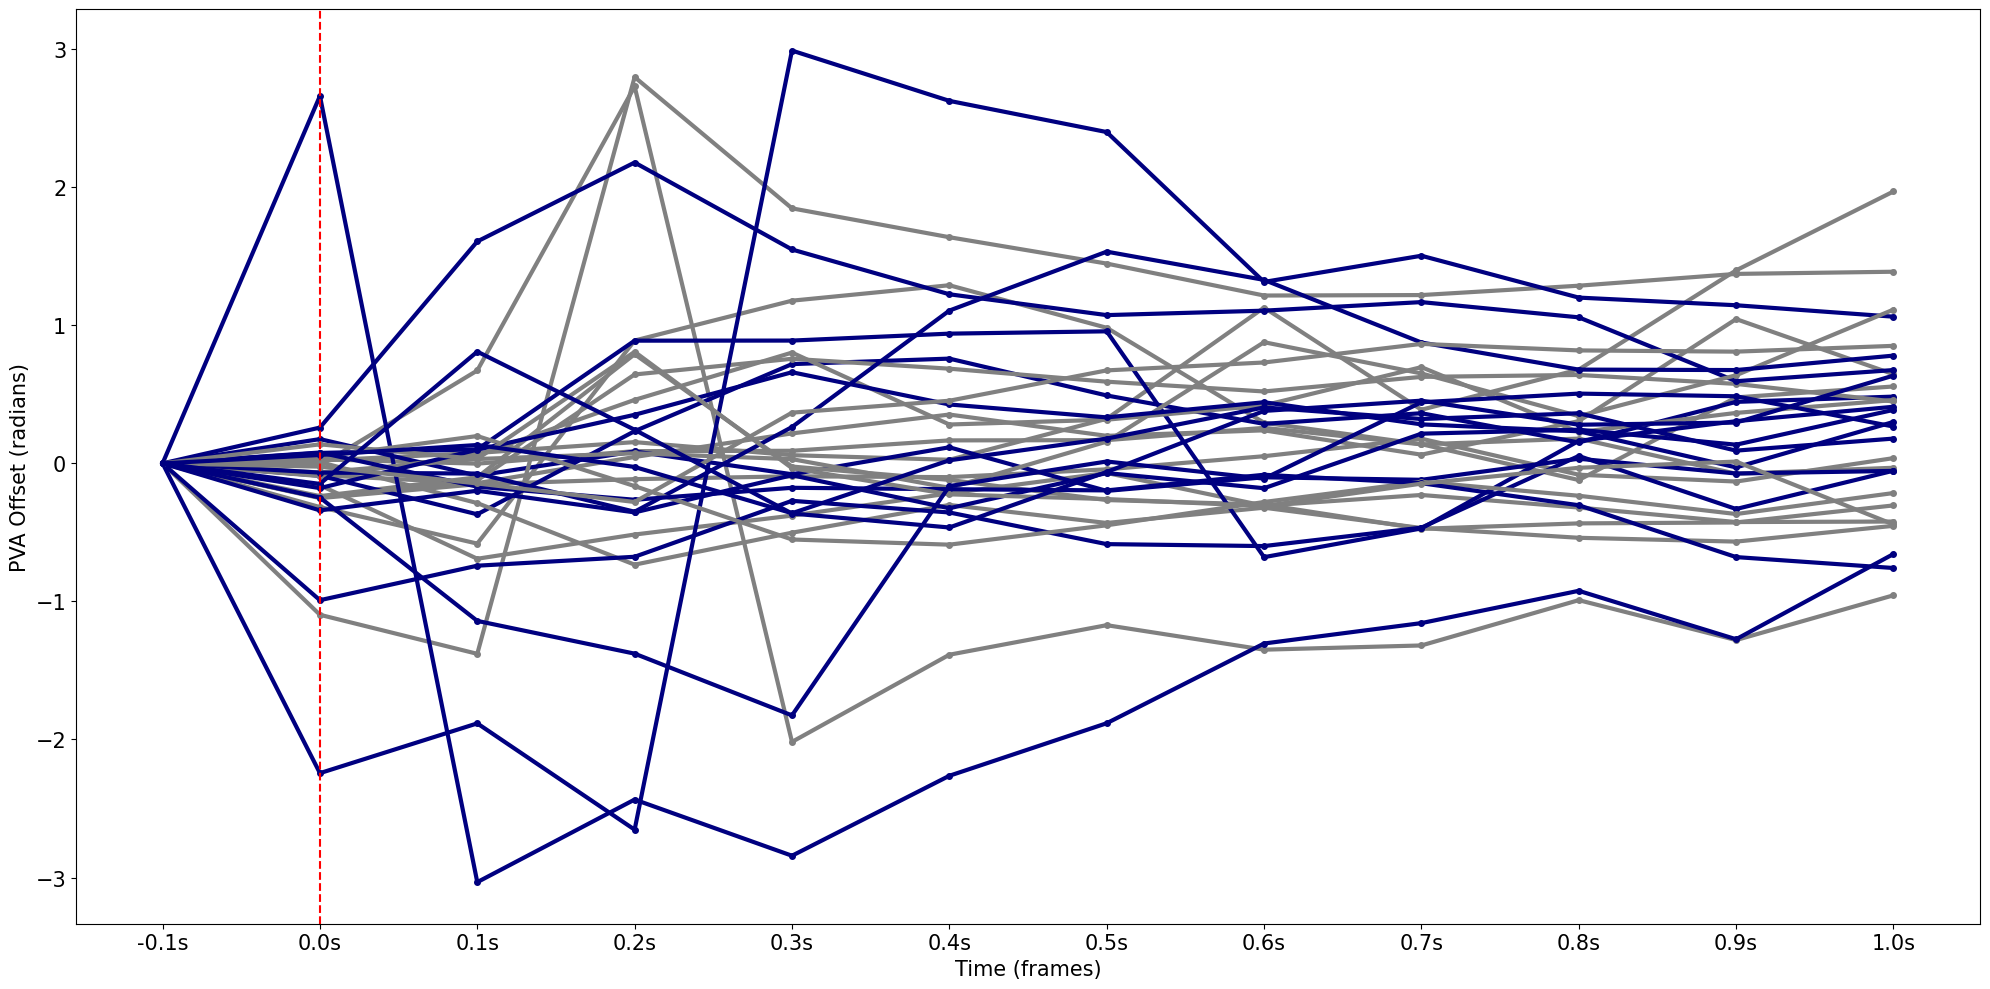

In [92]:
# Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_greed_red_PVA_offset']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = 0
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    
    
# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'navy')
    else:
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
#plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

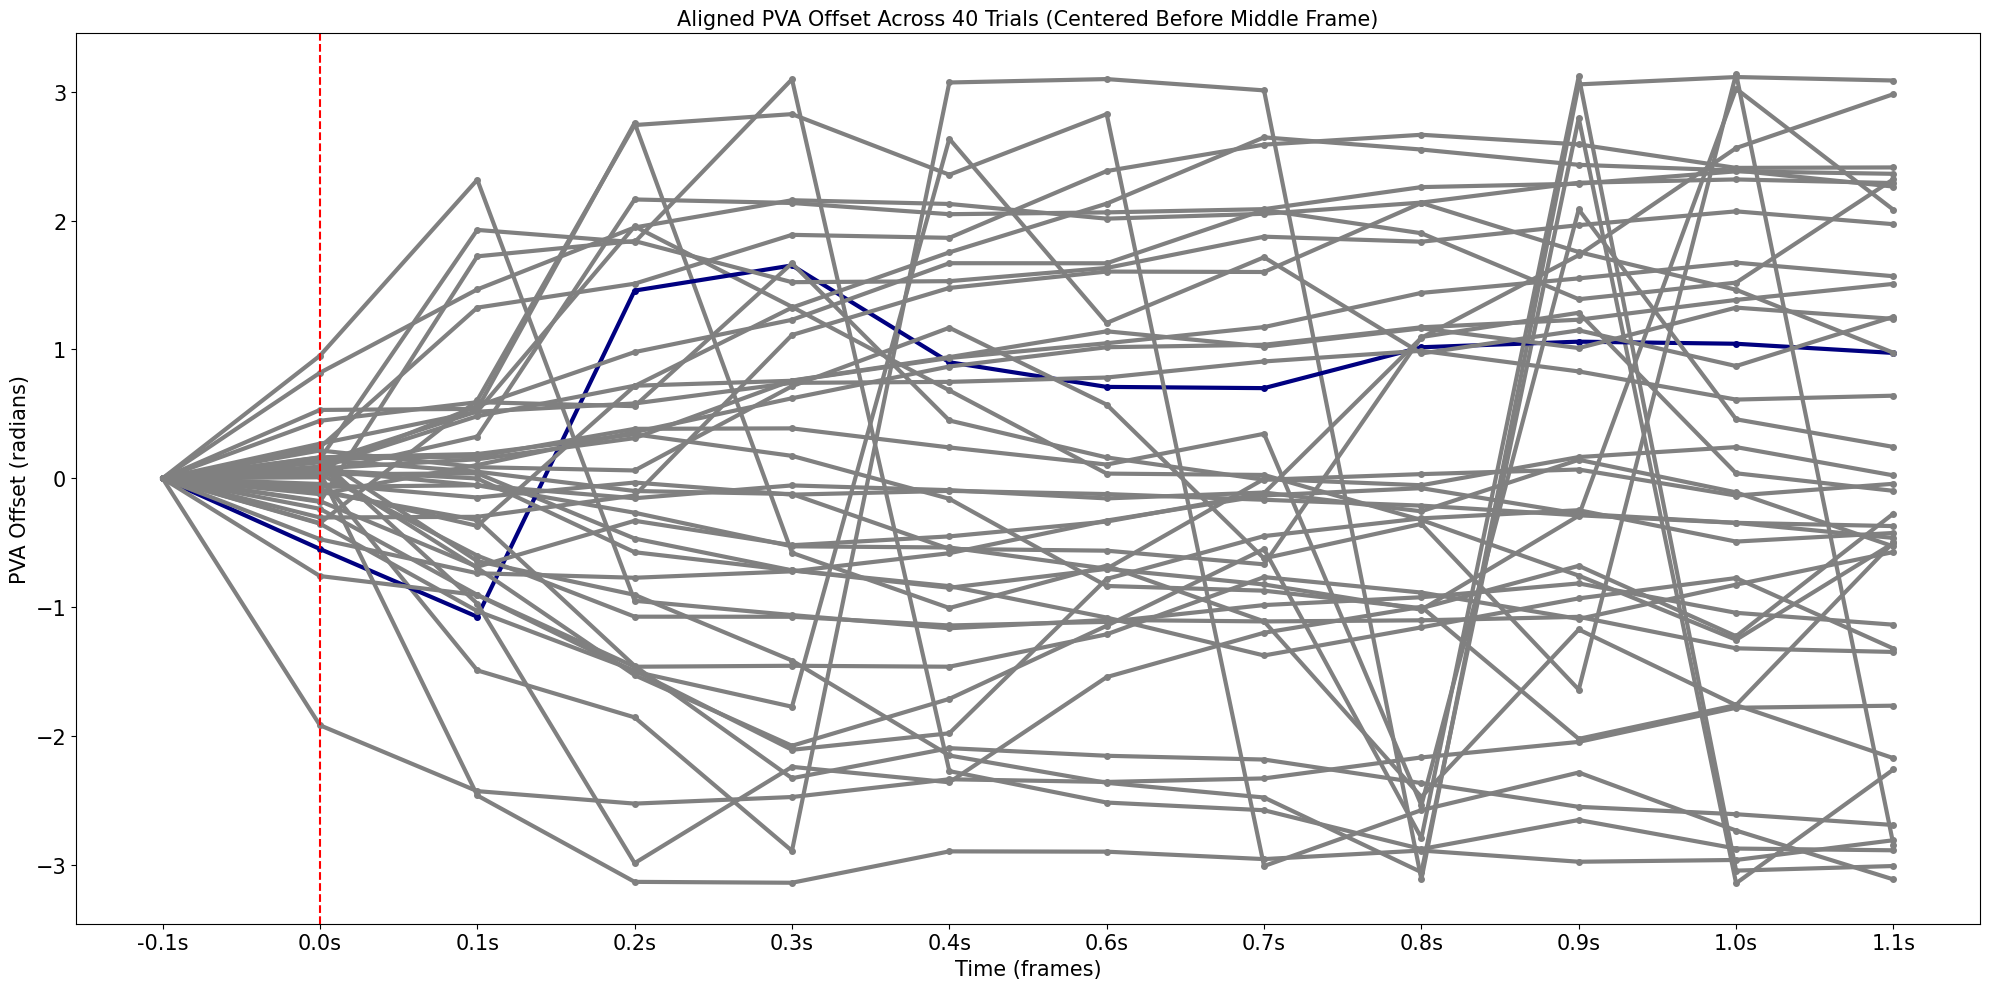

In [81]:
# Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_PVA_radian_pooled_red']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = 0
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    
    
# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'navy')
    else:
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

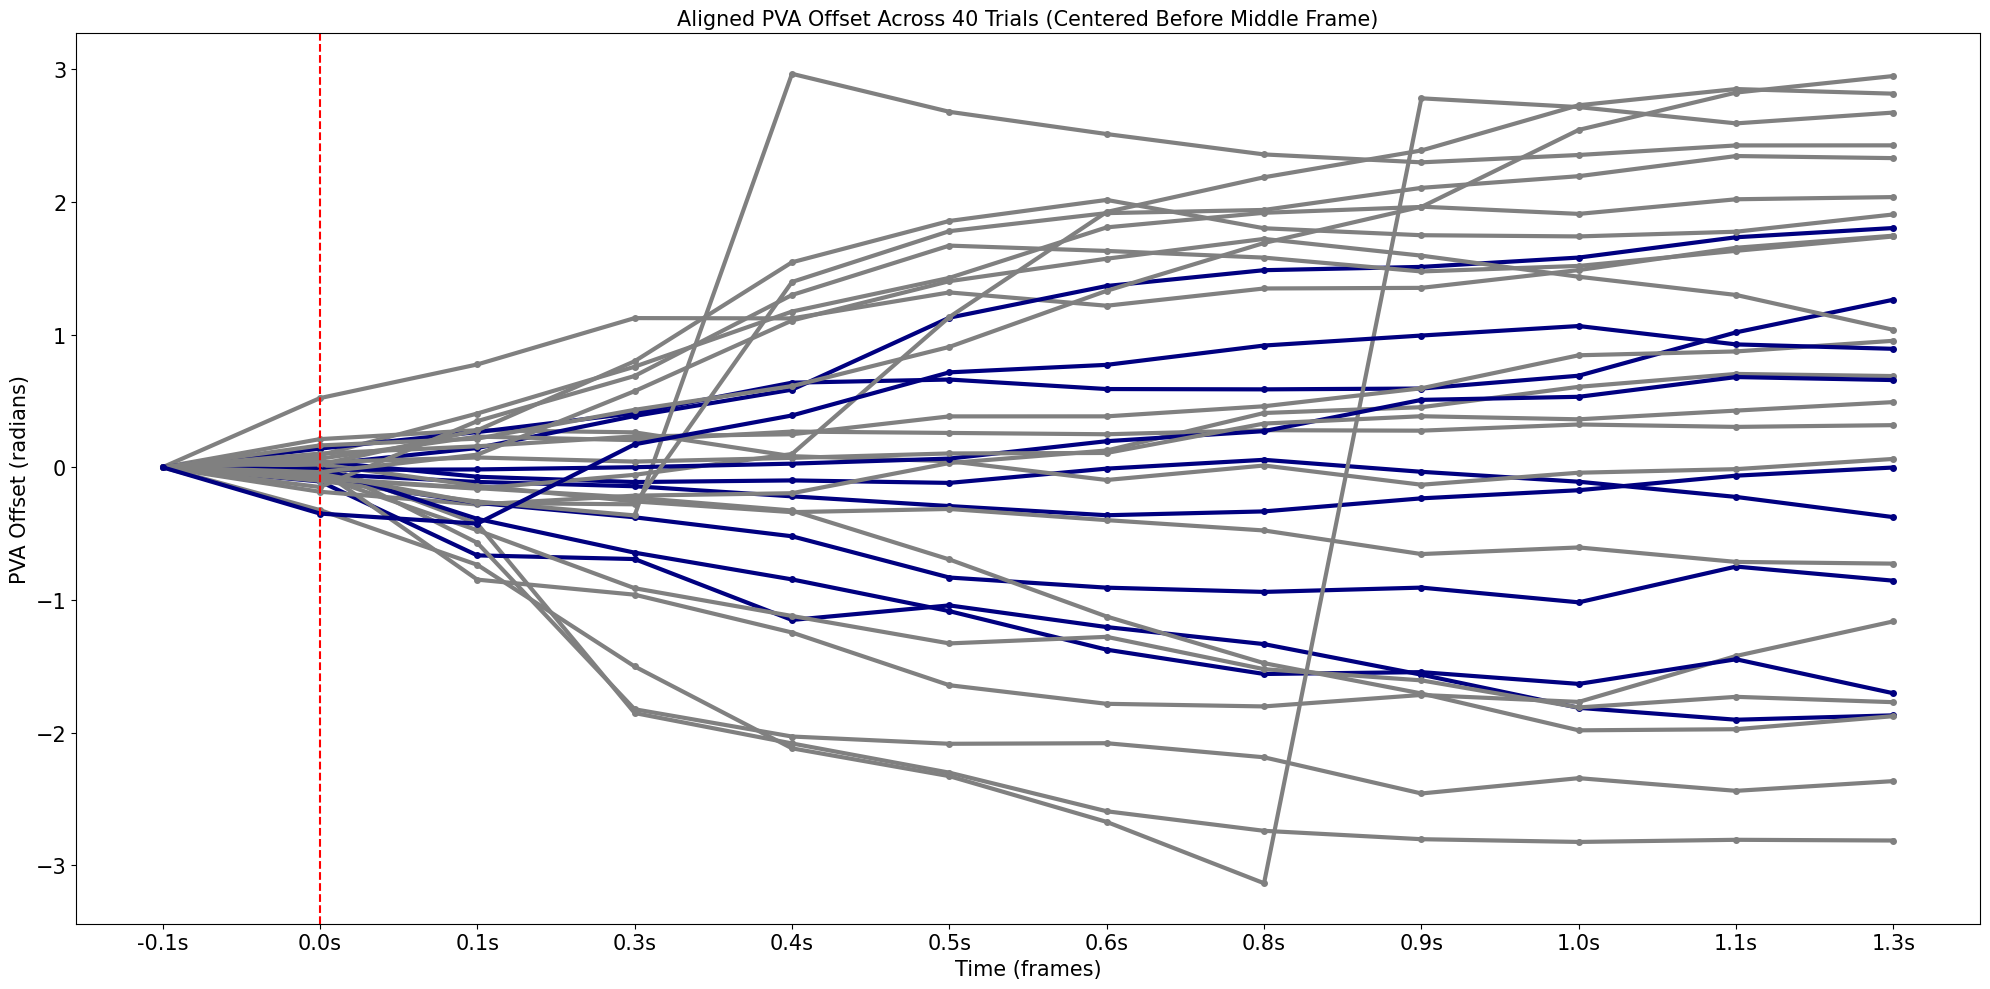

In [20]:
 # Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_PVA_radian_pooled']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = 0
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    
    
# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'navy')
    else:
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

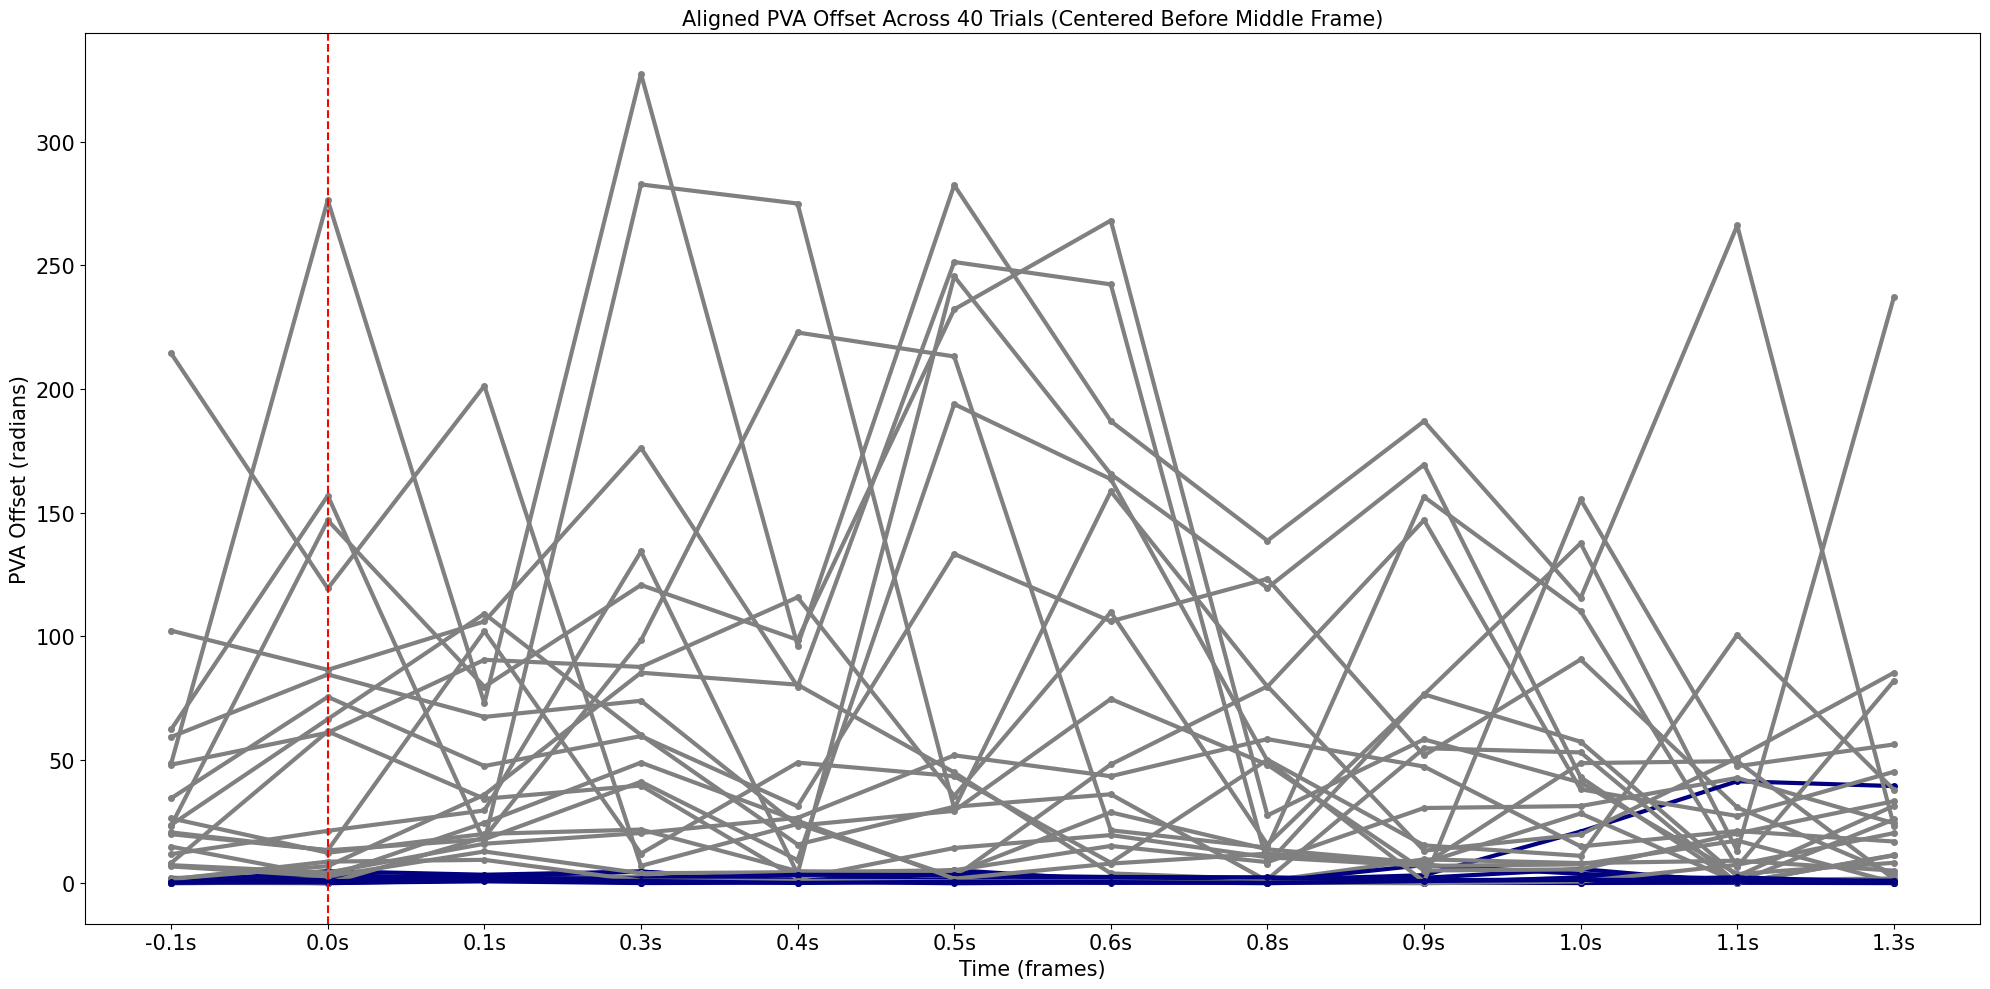

In [21]:


# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['Angular_speed']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]




# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

data = data.values

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(data.shape[0]):
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'navy')
    else:
        plt.plot(range(-1, 11  ), data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()